In [1]:
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\d.fernandezr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\d.fernandezr\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (2.1.2)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\d.fernandezr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [30]:
%pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB 8.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.6 MB 9.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.6 MB 9.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.7/11.6 MB 9.9 MB/s eta 0:00:02
   ------- -------------------------------- 2.2/11.6 MB 10.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/11.6 MB 10.1 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/11.6 MB 10.0 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/11.6 MB 10.0 MB/s eta 0:00:01
   ------------ --------------------------- 3.6/11.6 MB 8.8 MB/s eta 0:00:01
   -------------- ------------------------- 4.1/11.6 MB 9.0 MB/s eta 0:00:01
   --------------- ------------------------ 4.6/11.6 MB 9.1 MB/s eta 0:00:01
   ----------------- ---------------------- 5.1/11.6 MB 9.2 MB/s eta 0:00:01
  


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\d.fernandezr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import pandas as pd

# Australia Seismic Spectra

**AS 1170.4-2007 § 6.4 Spectral Shape Factor $(C_h(T))$**

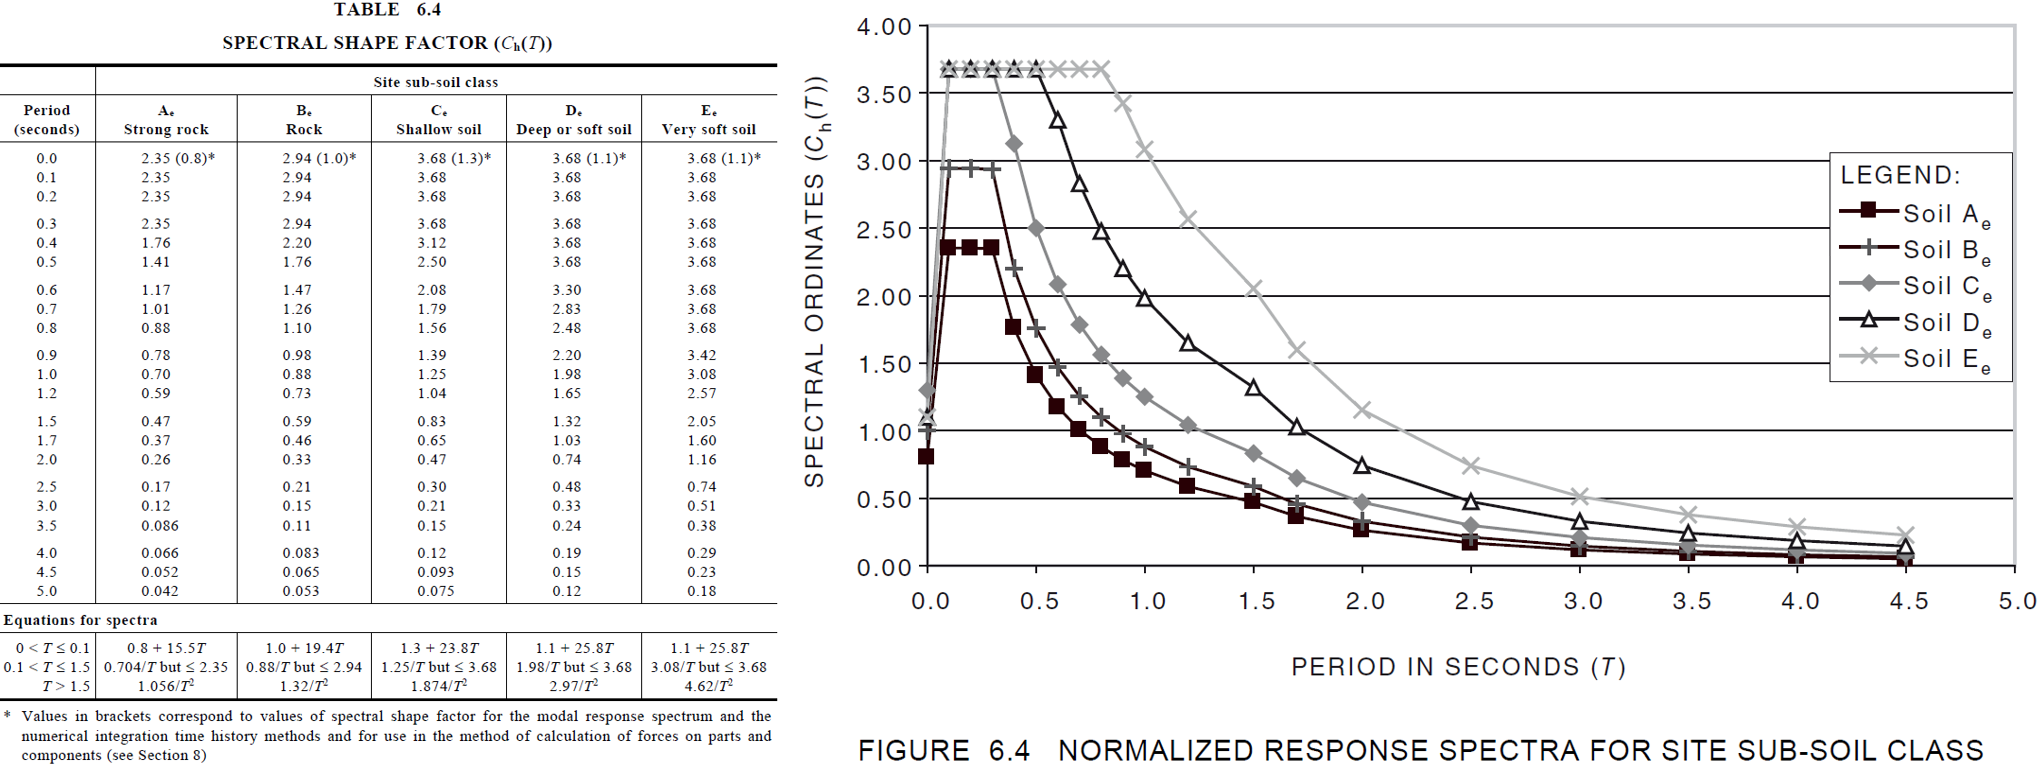


In [2]:
def spectral_shape_AS1170_2007 (period: float, site_class: str) -> float:
    """Calculate the design horizontal as AS 1170.4 - 2007
    
    Parameters:
        ■ period (float) → natural period of the structure
        ■ site_class (str) → site classification ('A_e','B_e','C_e','D_e','E_e',)
    
    Returns:
        ■ float → calculate aceleration in m/s²
    
    Raises:
        ■ ValueError → if period exceeds 5 seconds or an invalid site class is provided
        """
        
    # Ensure the period does not exceed the upper limit of 5 seconds
    if period > 10:
        raise ValueError(f'The value <period> should not exceed 5s. The input value was {period}')
    
    # Calculate spectral shape for site A_e
    if site_class == 'A_e':
        if 0 < period <= 0.1:
            return 0.8 + 15.5*period
        elif 0.1 < period <= 1.5:
            return min (0.704 / period, 2.35)
        else: 
            return 1.056 / period**2
    
    # Calculate spectral shape for site B_e
    if site_class == 'B_e':
        if 0 < period <= 0.1:
            return 1 + 19.4*period
        elif 0.1 < period <= 1.5:
            return min (0.88 / period, 2.94)
        else: 
            return 1.32 / period**2
        
    # Calculate spectral shape for site C_e
    if site_class == 'C_e':
        if 0 < period <= 0.1:
            return 1.3 + 23.8*period
        elif 0.1 < period <= 1.5:
            return min (1.25 / period, 3.68)
        else: 
            return 1.874 / period**2
        
    # Calculate spectral shape for site D_e
    if site_class == 'D_e':
        if 0 < period <= 0.1:
            return 1.1 + 25.8*period
        elif 0.1 < period <= 1.5:
            return min (1.98 / period, 3.68)
        else: 
            return 2.97 / period**2
        
    # Calculate spectral shape for site E_e
    if site_class == 'E_e':
        if 0 < period <= 0.1:
            return 1.1 + 25.8*period
        elif 0.1 < period <= 1.5:
            return min (3.08 / period, 3.68)
        else: 
            return 4.62 / period**2
    
    else:
        raise ValueError(f"Invalid site class <{site_class}>. Valid clasess are 'A_e', 'B_e', 'C_e', 'D_e', 'E_e'")  

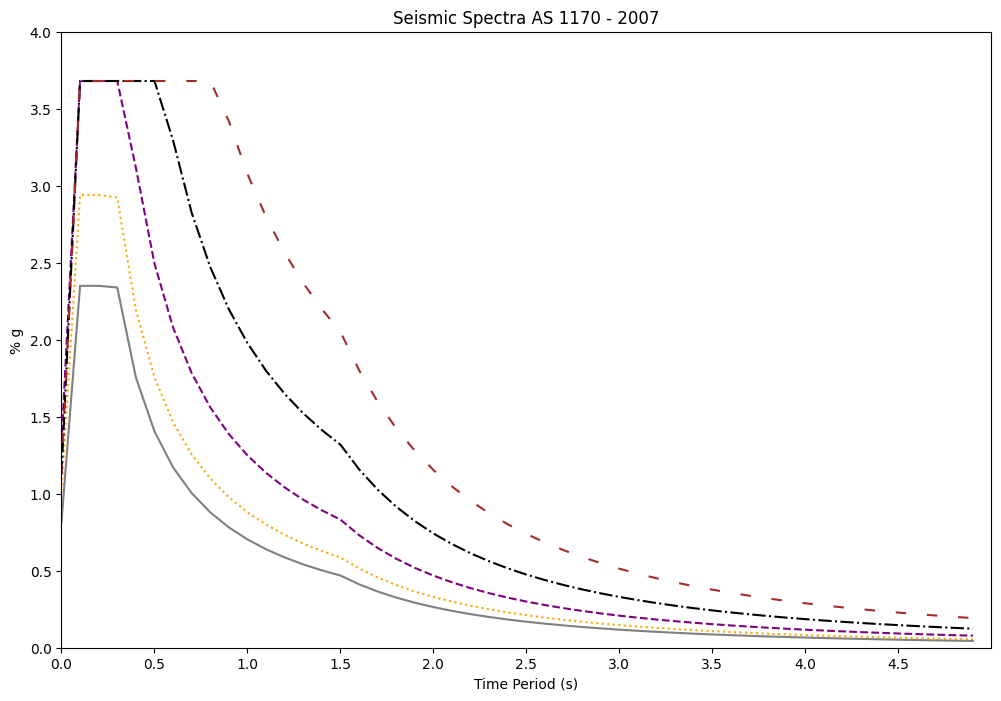

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8))

periods = np.arange(start=0.001, stop=5, step=0.1)

# Plot design spectra
reponse_A_e = []
for period in periods:
    responseA = spectral_shape_AS1170_2007(period, 'A_e')
    reponse_A_e.append(responseA)
    
    
reponse_B_e = []
for period in periods:
    responseB = spectral_shape_AS1170_2007(period, 'B_e')
    reponse_B_e.append(responseB)

reponse_C_e = []
for period in periods:
    responseC = spectral_shape_AS1170_2007(period, 'C_e')
    reponse_C_e.append(responseC)
    
reponse_D_e = []
for period in periods:
    responseD = spectral_shape_AS1170_2007(period, 'D_e')
    reponse_D_e.append(responseD)
    
reponse_E_e = []
for period in periods:
    responseE = spectral_shape_AS1170_2007(period, 'E_e')
    reponse_E_e.append(responseE)
    
ax.plot(periods, reponse_A_e, label='Site Class A_e', color ='grey', linestyle='-')             # - solid
ax.plot(periods, reponse_B_e, label='Site Class B_e', color ='orange', linestyle=':')           # : doted
ax.plot(periods, reponse_C_e, label='Site Class C_e', color ='purple', linestyle='--')          # -- dashed  
ax.plot(periods, reponse_D_e, label='Site Class D_e', color ='black', linestyle='-.')           # -. dashot
ax.plot(periods, reponse_E_e, label='Site Class E_e', color ='brown', linestyle=(0, (5, 10)))   # customize


# Formatting
ax.set_xlabel('Time Period (s)')
ax.set_ylabel('% g')
ax.set_xlim(left=0, right=5)
ax.set_ylim(bottom=0, top=4)
ax.set_title('Seismic Spectra AS 1170 - 2007')
ax.set_xticks(np.arange(start=0, stop=5, step=0.5)) # Change the marks of x axis
# ax.legend()
# ax.grid()

# Building modal periods and ranges


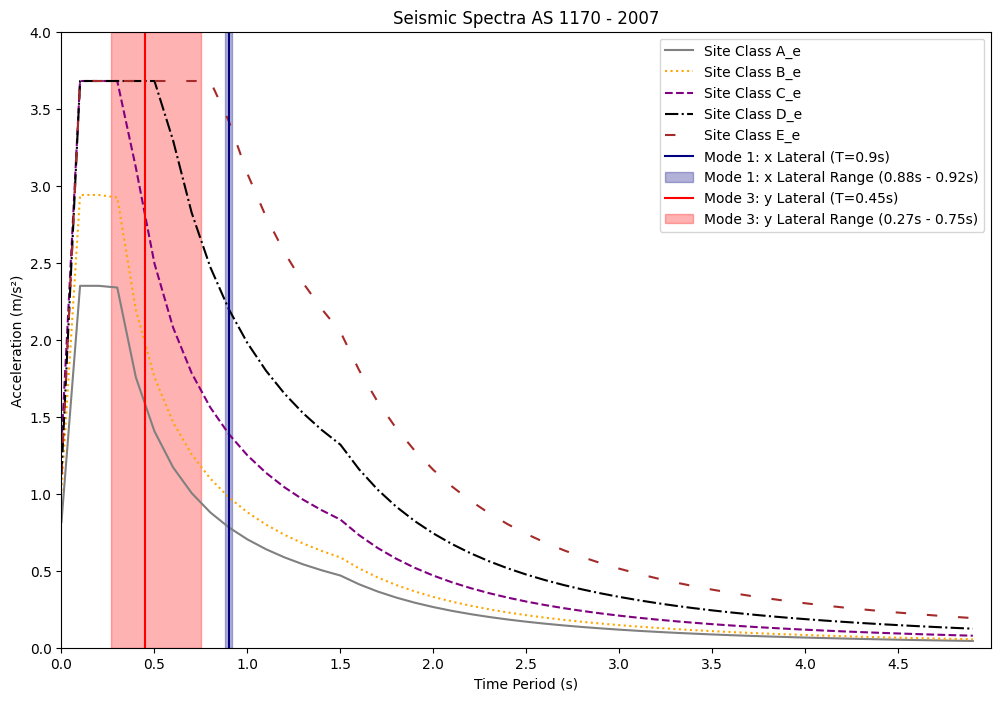

In [7]:
plt.close('all')

# Building modal periods and ranges
modal_periods = [0.9, 0.45]
feasible_ranges = [(0.88,0.92), (0.27, 0.75)]
modes = ['Mode 1: x Lateral', 'Mode 3: y Lateral']
colors = ['navy', 'red']

# Vertial lines and shaded region for modal periods
for period, (low, high), mode, color in zip(modal_periods, feasible_ranges, modes, colors):
    ax.axvline(x=period, color=color, linestyle='-', label = f'{mode} (T={period}s)')
    ax.fill_betweenx(y=[0, 4], x1=low, x2=high, color=color, alpha=0.3, label = f'{mode} Range ({low}s - {high}s)')

ax.legend()
fig

The next step is to take into account:

- Location → Hazar design factor $(Z)$ 
- Return period → Probability $(k_p)$
- Type of structure 
  - Ductility $(μ)$
  - Performance Factor $(S_p)$

$$\frac{K_pZ·S_p}{μ}$$

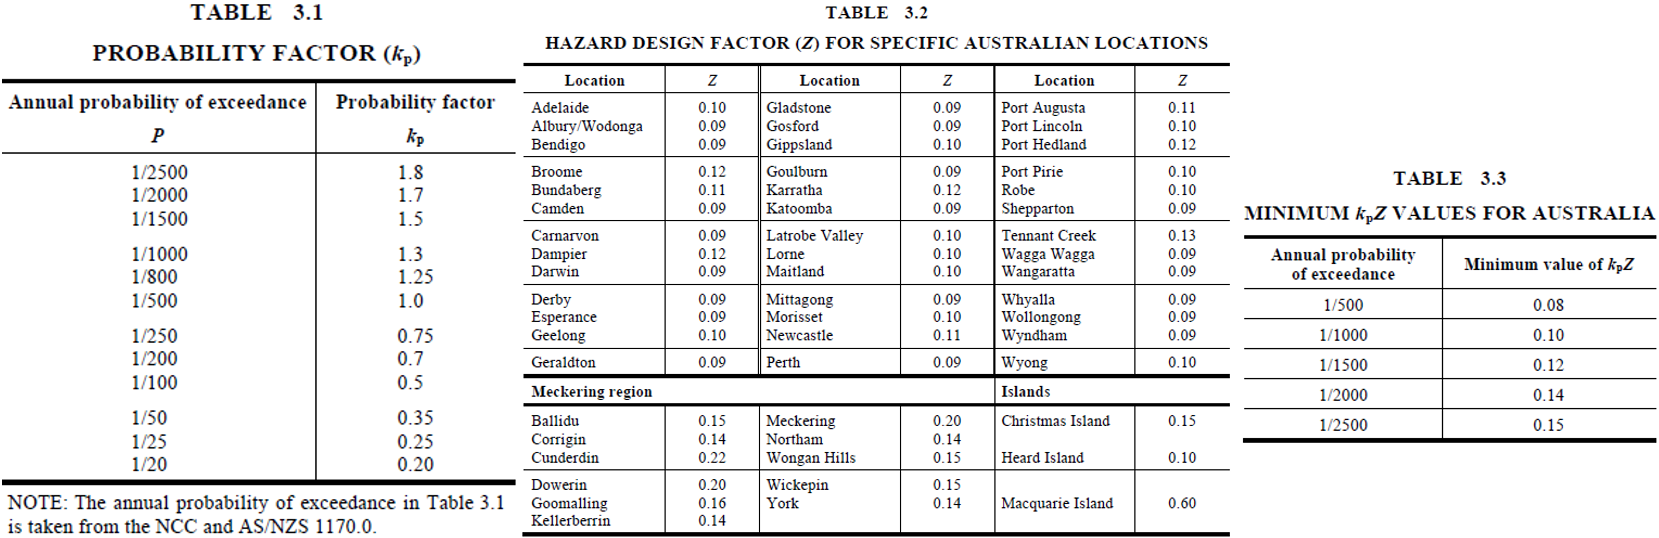


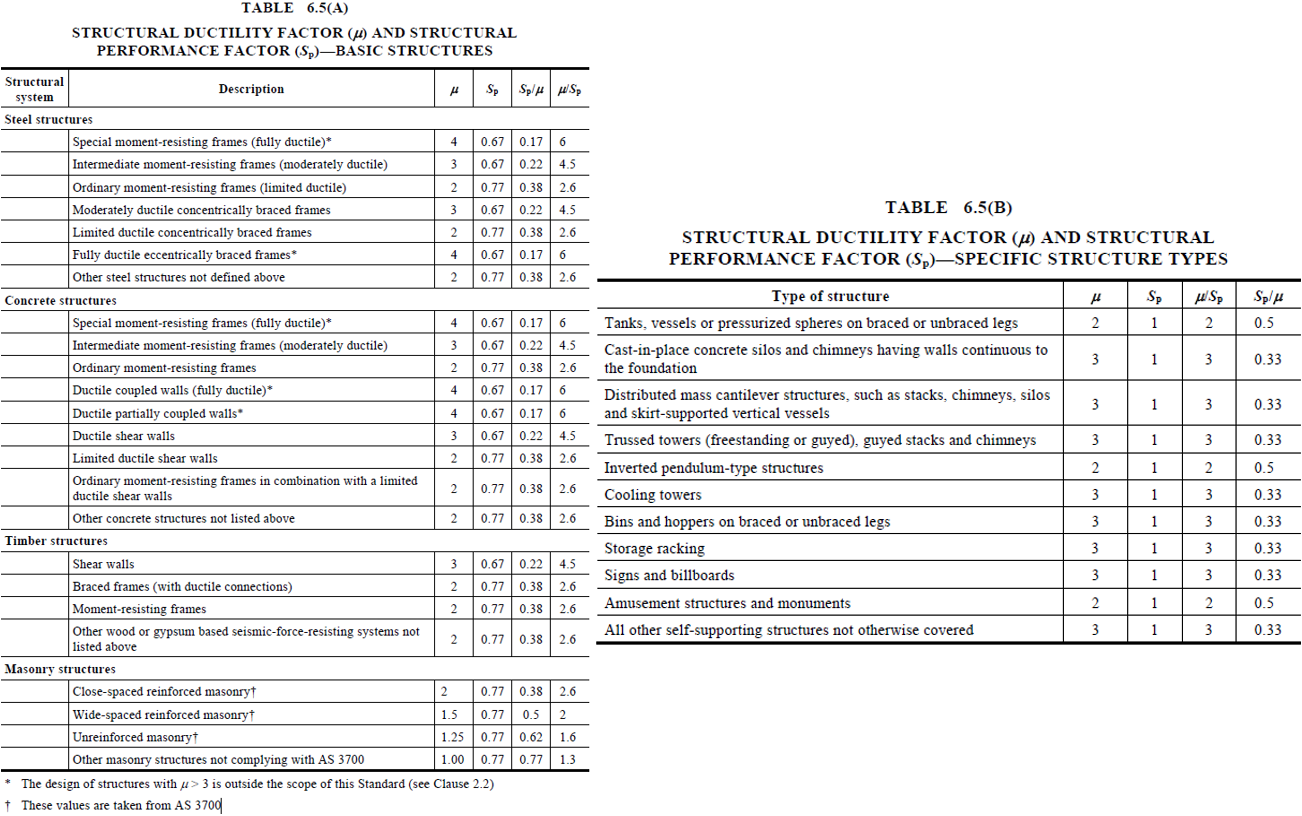


Waht we are looking for is a scalar of the seismic spectra shape

In [15]:
# First approach → runs correctly 

"""def scaled_spectral_shape(k_p, Z, μ, S_p, tolerance):
    """Calculate the scaled spectral shape.
    
    Parameters:
        ■ k_p (float) → Probability factor
        ■ Z (float) → Hazard Design Factor
        ■ μ (float) → Ductility
        ■ S_p (float) → Structural Performance Factor
        ■ tolerance (float, optional) → maximum allowable value
    
    Returns:
        ■ float → scaled spectral shape
    """
    result = (k_p * Z * S_p / μ)
    
    # Apply tolerance if specified
    if tolerance is not None and result > tolerance:
        result = tolerance
        
    return result"""

In [29]:
"""tipical_steel_building = scaled_spectral_shape(k_p=1.3, Z=0.09, μ=2, S_p=0.77, tolerance=0.1)
print(f'{tipical_steel_building:.3f}')"""

0.045


## Improve the first approach trying to automitized

In [8]:
# Tables as dictionaries
    
    # Probability Factor (k_p)
probability_factors = {
    "1/2500": 1.8,
    "1/2000": 1.7,
    "1/1500": 1.5,
    "1/1000": 1.3,
    "1/800": 1.25,
    "1/500": 1.0,
    "1/250": 0.75,
    "1/200": 0.7,
    "1/100": 0.5,
    "1/50": 0.35,
    "1/25": 0.25,
    "1/20": 0.2 }

    # Hazard Design Factor (Z)
hazard_design_factors = {
    "Adelaide": 0.1,
    "Albury/Wodonga": 0.09,
    "Bendigo": 0.09,
    "Broome": 0.12,
    "Bundaberg": 0.11,
    "Camden": 0.09,
    "Carnarvon": 0.09,
    "Dampier": 0.12,
    "Darwin": 0.09,
    "Derby": 0.09,
    "Esperance": 0.09,
    "Geelong": 0.10,
    "Geraldton": 0.09,
    "Gladstone": 0.09,
    "Gosford": 0.09,
    "Gippsland": 0.10,
    "Goulburn": 0.09,
    "Karratha": 0.12,
    "Katoomba": 0.09,
    "Latrobe Valley": 0.10,
    "Lorne": 0.10,
    "Maitland": 0.10,
    "Mittagong": 0.09,
    "Morisset": 0.10,
    "Newcastle": 0.11,
    "Perth": 0.09,
    "Port Augusta": 0.11,
    "Port Lincoln": 0.10,
    "Port Hedland": 0.12,
    "Port Pirie": 0.10,
    "Robe": 0.10,
    "Shepparton": 0.09,
    "Tennant Creek": 0.113,
    "Wagga Wagga": 0.09,
    "Wangaratta": 0.09,
    "Whyalla": 0.09,
    "Wollongong": 0.09,
    "Wollongong": 0.09,
    "Wyong": 0.10,
    ####
    "Ballidu": 0.15,
    "Corrigin": 0.14,
    "Cunderdin": 0.22,
    "Dowerin": 0.20,
    "Goomalling": 0.16,
    "Kellerberrin": 0.14,
    "Meckering": 0.20,
    "Northam": 0.14,
    "Wogan Hills": 0.15,
    "Wickepin": 0.15,
    "York": 0.14,
    ###
    "Christmas Island": 0.15,
    "Heard Island": 0.10,
    "Macquarie": 0.60}

    # Structural Ductility Factor (μ) y Structural Performance Factor (S_p)
steel_factors = {
    'Special moment-resisting frames (fully ductile)' : {'μ': 4, 'S_p': 0.67},
    'Intermediate moment-resisting frames (moderately ductile)' : {'μ': 3, 'S_p': 0.67},
    'Ordinary moment-resisting frames (limited ductile)' : {'μ': 2, 'S_p': 0.77},
    'Moderately ductile concentrically braced frames' : {'μ': 3, 'S_p': 0.67},
    'Limited ductile concentrically braced frames' : {'μ': 2, 'S_p': 0.77},
    'Fully ductile eccentrically braced frames' : {'μ': 4, 'S_p': 0.67},
    'Other steel structures not defined above' : {'μ': 2, 'S_p': 0.77}}


Table_k_p = pd.DataFrame.from_dict(probability_factors, orient='index', columns=['k_p'])
print('Probability factors')
print(Table_k_p)
Table_location = pd.DataFrame.from_dict(hazard_design_factors, orient='index', columns=['Z'])
print('\n\nLocations')
print(Table_location)
Table_ductility = pd.DataFrame.from_dict(steel_factors, orient='index')
print('\n\nDuctility')
print(Table_ductility)

Probability factors
         k_p
1/2500  1.80
1/2000  1.70
1/1500  1.50
1/1000  1.30
1/800   1.25
1/500   1.00
1/250   0.75
1/200   0.70
1/100   0.50
1/50    0.35
1/25    0.25
1/20    0.20


Locations
                      Z
Adelaide          0.100
Albury/Wodonga    0.090
Bendigo           0.090
Broome            0.120
Bundaberg         0.110
Camden            0.090
Carnarvon         0.090
Dampier           0.120
Darwin            0.090
Derby             0.090
Esperance         0.090
Geelong           0.100
Geraldton         0.090
Gladstone         0.090
Gosford           0.090
Gippsland         0.100
Goulburn          0.090
Karratha          0.120
Katoomba          0.090
Latrobe Valley    0.100
Lorne             0.100
Maitland          0.100
Mittagong         0.090
Morisset          0.100
Newcastle         0.110
Perth             0.090
Port Augusta      0.110
Port Lincoln      0.100
Port Hedland      0.120
Port Pirie        0.100
Robe              0.100
Shepparton        0.090
Tennant

In [43]:
def get_probability_factor(p: str):
    """Obtain k_p from return period"""
    return probability_factors.get(p, None)

def get_hazard_design_factor(location: str):
    """Obtain Z from location"""
    return hazard_design_factors.get(location)

def get_steel_factors(steel_type: str):
    """Obtanin ductility adn Structural Performance"""
    return steel_factors.get(steel_type)

def scaled_spectral_shape(p, location, steel_type, tolerance: float = None):
    """Calculate the scaled spectral shape.
    
    Parameters:
        ■ k_p (float) → Probability factor
        ■ Z (float) → Hazard Design Factor
        ■ μ (float) → Ductility
        ■ S_p (float) → Structural Performance Factor
        ■ tolerance (float, optional) → maximum allowable value
    
    Returns:
        ■ float → scaled spectral shape
    """
    
    k_p = get_probability_factor(p)
    Z = get_hazard_design_factor(location)
    factors = get_steel_factors(steel_type)
    
    if not k_p or not Z or not factors:
        raise ValueError('Not all factors necessary for the analysis were found.')
    
    μ = factors['μ']
    S_p = factors['S_p']
        
    result = (k_p * Z * S_p / μ)
    
    # Apply tolerance if specified
    if tolerance is not None and result > tolerance:
        result = tolerance
        
    return result

In [45]:
tipical_steel_building = scaled_spectral_shape(p='1/1000', location='Gladstone', steel_type='Other steel structures not defined above', tolerance=0.1)
print(f'{tipical_steel_building:.3f}')

0.045


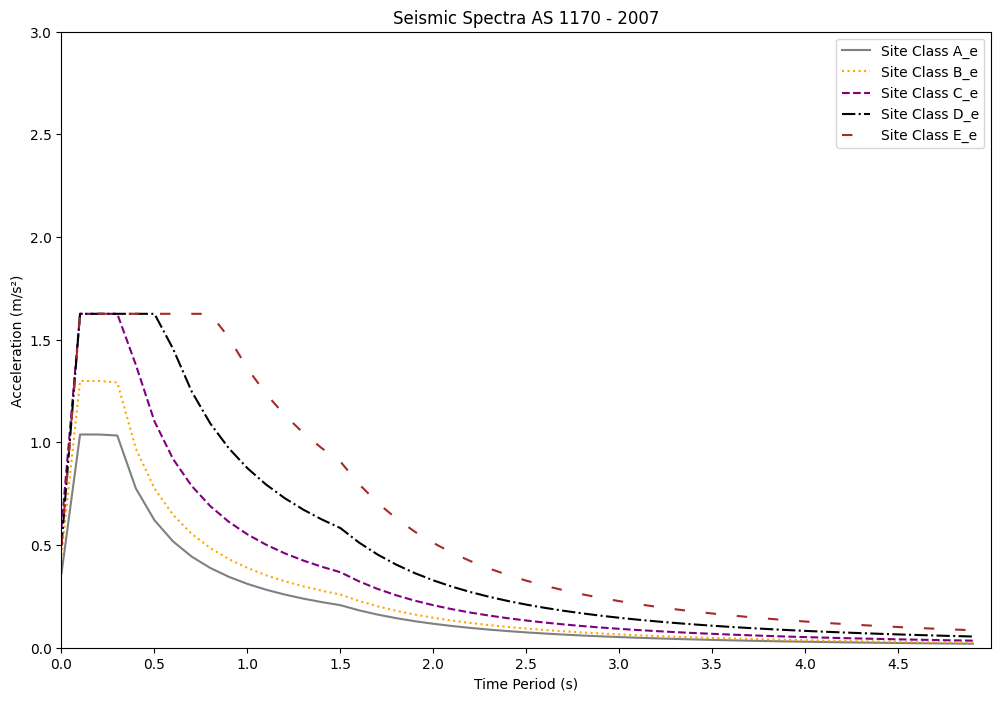

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8))

periods = np.arange(start=0.001, stop=5, step=0.1)

# Plot design spectra
reponse_A_e = []
for period in periods:
    responseA = 9.81*spectral_shape_AS1170_2007(period, 'A_e')*tipical_steel_building   # 9.81 m/s² = g to transform 
    reponse_A_e.append(responseA)
    
    
reponse_B_e = []
for period in periods:
    responseB = 9.81*spectral_shape_AS1170_2007(period, 'B_e')*tipical_steel_building   # 9.81 m/s² = g to transform 
    reponse_B_e.append(responseB)

reponse_C_e = []
for period in periods:
    responseC = 9.81*spectral_shape_AS1170_2007(period, 'C_e')*tipical_steel_building   # 9.81 m/s² = g to transform 
    reponse_C_e.append(responseC)
    
reponse_D_e = []
for period in periods:
    responseD = 9.81*spectral_shape_AS1170_2007(period, 'D_e')*tipical_steel_building   # 9.81 m/s² = g to transform 
    reponse_D_e.append(responseD)
    
reponse_E_e = []
for period in periods:
    responseE = 9.81*spectral_shape_AS1170_2007(period, 'E_e')*tipical_steel_building   
    reponse_E_e.append(responseE)
    
ax.plot(periods, reponse_A_e, label='Site Class A_e', color ='grey', linestyle='-')             # - solid
ax.plot(periods, reponse_B_e, label='Site Class B_e', color ='orange', linestyle=':')           # : doted
ax.plot(periods, reponse_C_e, label='Site Class C_e', color ='purple', linestyle='--')          # -- dashed  
ax.plot(periods, reponse_D_e, label='Site Class D_e', color ='black', linestyle='-.')           # -. dashot
ax.plot(periods, reponse_E_e, label='Site Class E_e', color ='brown', linestyle=(0, (5, 10)))   # customize


# Formatting
ax.set_xlabel('Time Period (s)')
ax.set_ylabel('Acceleration (m/s²)')
ax.set_xlim(left=0, right=5)
ax.set_ylim(bottom=0, top=3)
ax.set_title('Seismic Spectra AS 1170 - 2007')
ax.set_xticks(np.arange(start=0, stop=5, step=0.5)) # Change the marks of x axis
ax.legend()

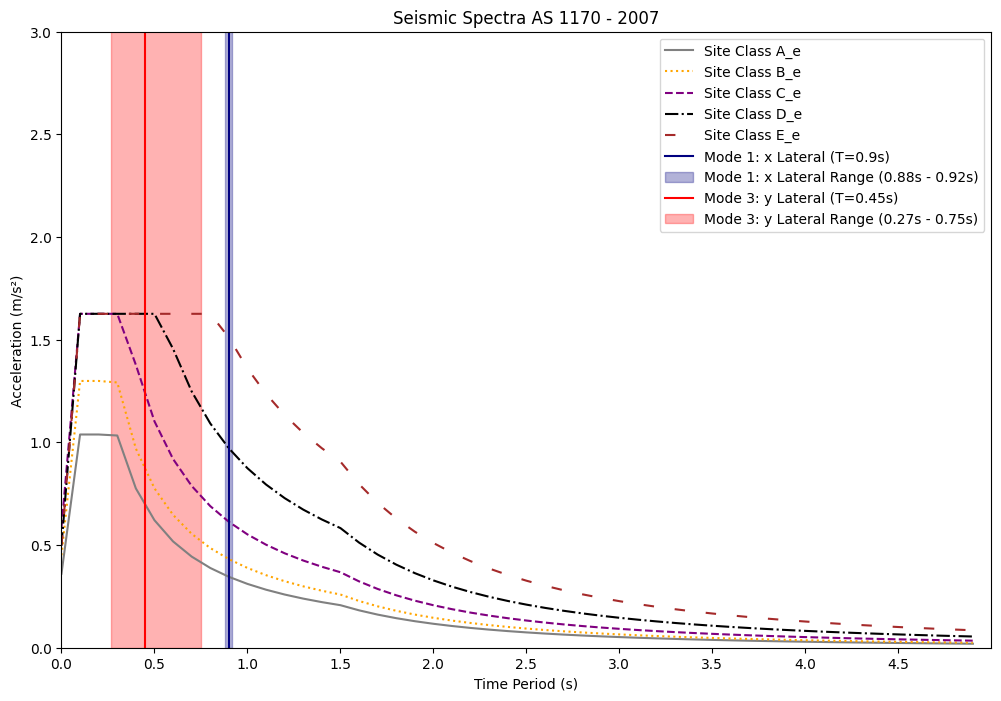

In [47]:
plt.close('all')

# Building modal periods and ranges
modal_periods = [0.9, 0.45]
feasible_ranges = [(0.88,0.92), (0.27, 0.75)]
modes = ['Mode 1: x Lateral', 'Mode 3: y Lateral']
colors = ['navy', 'red']

# Vertial lines and shaded region for modal periods
for period, (low, high), mode, color in zip(modal_periods, feasible_ranges, modes, colors):
    ax.axvline(x=period, color=color, linestyle='-', label = f'{mode} (T={period}s)')
    ax.fill_betweenx(y=[0, 4], x1=low, x2=high, color=color, alpha=0.3, label = f'{mode} Range ({low}s - {high}s)')

ax.legend()
fig